In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import csv
import csv as reader
import sqlite3 as sql
import psycopg2 as pc
import mysql.connector 
import random as rd
import requests, urllib, json
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from petl import look, fromdb, fromjson,  unpackdict, fromdicts, cut, rename, tocsv
from pandas import DataFrame
from sklearn.decomposition import PCA

In [2]:
#################### DATA INTEGRATION ####################

In [3]:
#Extracting CSV file from the computer
world_happiness_2019_1 = pd.read_csv('wh_2019_revised - 1.csv')
world_happiness_2019_1.head()

,Country_name,Regional_indicator,year,Log_GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Perceptions_of_corruption,Ladder_score
0,Afghanistan,South Asia,2019,7.697,0.420,52.4,0.394,0.924,2.375
1,Albania,Central and Eastern Europe,2019,9.544,0.686,69.0,0.777,0.914,4.995
2,Algeria,Middle East and North Africa,2019,9.337,0.803,66.1,0.385,0.741,4.745
3,Argentina,Latin America and Caribbean,2019,10.000,0.896,69.0,0.817,0.830,6.086
4,Armenia,Commonwealth of Independent States,2019,9.522,0.782,67.2,0.844,0.583,5.488


In [4]:
world_happiness_2019_1.tail()

,Country_name,Regional_indicator,year,Log_GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Perceptions_of_corruption,Ladder_score
37,Gabon,Sub-Saharan Africa,2019,9.607,0.763,60.2,0.736,0.846,4.914
38,Gambia,Sub-Saharan Africa,2019,7.699,0.694,55.3,0.677,0.798,5.164
39,Georgia,Commonwealth of Independent States,2019,9.617,0.675,64.3,0.811,0.647,4.892
40,Germany,Western Europe,2019,10.893,0.886,72.5,0.885,0.462,7.035
41,Ghana,Sub-Saharan Africa,2019,8.596,0.746,57.6,0.787,0.857,4.967


In [5]:
#Extracting CSV file from Google Drive
url = 'https://drive.google.com/file/d/1kHKYyGDTox4gllBxXB3FYLOJCkdVTUVF/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id=' + url.split('/')[-2]
path

'https://drive.google.com/uc?export=download&id=1kHKYyGDTox4gllBxXB3FYLOJCkdVTUVF'

In [6]:
world_happiness_2019_2 = pd.read_csv('wh_2019_revised - 2.csv')
world_happiness_2019_2.head()

,Country_name,Regional_indicator,year,Log_GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Perceptions_of_corruption,Ladder_score
0,Greece,Western Europe,2019,10.319,0.891,72.6,0.614,0.848,5.952
1,Guatemala,Latin America and Caribbean,2019,9.064,0.774,65.1,0.901,0.773,6.262
2,Guinea,Sub-Saharan Africa,2019,7.849,0.655,55.5,0.691,0.756,4.768
3,Honduras,Latin America and Caribbean,2019,8.653,0.797,67.4,0.846,0.815,5.930
4,Hungary,Central and Eastern Europe,2019,10.393,0.947,68.0,0.798,0.884,6.000


In [7]:
world_happiness_2019_2.tail()

,Country_name,Regional_indicator,year,Log_GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Perceptions_of_corruption,Ladder_score
37,Myanmar,Southeast Asia,2019,8.545,0.763,59.3,0.899,0.682,4.434
38,Namibia,Sub-Saharan Africa,2019,9.173,0.845,56.8,0.739,0.879,4.436
39,Nepal,South Asia,2019,8.136,0.772,64.6,0.790,0.712,5.449
40,Netherlands,Western Europe,2019,10.953,0.941,72.4,0.886,0.360,7.425
41,New Zealand,North America and ANZ,2019,10.666,0.939,73.4,0.912,0.234,7.205


In [8]:
#SQLITE
conn_sqlite = sql.connect('wh_db_sqlite.db')

In [9]:
cursor = conn_sqlite.cursor()

In [10]:
csv_sqlite = pd.read_csv('wh_2019_revised - 3.csv')

In [11]:
csv_sqlite.to_sql(name = 'wh_2019_sqlite', con = conn_sqlite, index = False, if_exists = 'replace')

In [12]:
world_happiness_2019_3 = pd.read_sql_query('SELECT * FROM wh_2019_sqlite', conn_sqlite)
world_happiness_2019_3.head()

,Country_name,Regional_indicator,year,Log_GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Perceptions_of_corruption,Ladder_score
0,Nicaragua,Latin America and Caribbean,2019,8.595,0.874,67.800,0.883,0.622,6.113
1,Niger,Sub-Saharan Africa,2019,7.106,0.677,54.000,0.831,0.729,5.004
2,Nigeria,Sub-Saharan Africa,2019,8.544,0.734,50.100,0.729,0.873,4.356
3,North Macedonia,Central and Eastern Europe,2019,9.711,0.815,65.474,0.725,0.923,5.015
4,Norway,Western Europe,2019,11.061,0.942,73.300,0.954,0.271,7.442


In [13]:
world_happiness_2019_3.tail()

,Country_name,Regional_indicator,year,Log_GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Perceptions_of_corruption,Ladder_score
37,Uruguay,Latin America and Caribbean,2019,9.979,0.933,69.1,0.903,0.599,6.600
38,Uzbekistan,Commonwealth of Independent States,2019,8.853,0.915,65.4,0.970,0.511,6.154
39,Vietnam,Southeast Asia,2019,8.992,0.848,68.1,0.952,0.788,5.467
40,Zambia,Sub-Saharan Africa,2019,8.155,0.638,55.8,0.811,0.832,3.307
41,Zimbabwe,Sub-Saharan Africa,2019,7.950,0.759,56.2,0.632,0.831,2.694


In [14]:
#PostgreSQL
conn_postgres = pc.connect("dbname = world_happiness user = postgres password = @Ngelo8998 host = localhost")
c_postgres = conn_postgres.cursor()

In [15]:
engine_postgres = create_engine('postgresql+psycopg2://postgres:@Ngelo8998@localhost:5432/world_happiness')

In [16]:
csv_postgres = pd.read_csv('wh_2021_revised - 1.csv')

In [17]:
csv_postgres.to_sql('wh_2021_postgresql', engine_postgres, index = False, if_exists = 'replace')

In [18]:
world_happiness_2021_1 = pd.read_sql_query('SELECT * FROM wh_2021_postgresql', conn_postgres)
world_happiness_2021_1.head()

,Country_name,Regional_indicator,year,Log_GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Perceptions_of_corruption,Ladder_score
0,Afghanistan,South Asia,2021,7.695,0.463,52.493,0.382,0.924,2.523
1,Albania,Central and Eastern Europe,2021,9.520,0.697,68.999,0.785,0.901,5.117
2,Algeria,Middle East and North Africa,2021,9.342,0.802,66.005,0.480,0.752,4.887
3,Argentina,Latin America and Caribbean,2021,9.962,0.898,69.000,0.828,0.834,5.929
4,Armenia,Commonwealth of Independent States,2021,9.487,0.799,67.055,0.825,0.629,5.283


In [19]:
world_happiness_2021_1.tail()

,Country_name,Regional_indicator,year,Log_GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Perceptions_of_corruption,Ladder_score
37,Gabon,Sub-Saharan Africa,2021,9.603,0.776,59.962,0.731,0.840,4.852
38,Gambia,Sub-Saharan Africa,2021,7.686,0.690,55.160,0.697,0.746,5.051
39,Georgia,Commonwealth of Independent States,2021,9.585,0.671,64.300,0.783,0.655,4.891
40,Germany,Western Europe,2021,10.873,0.903,72.500,0.875,0.460,7.155
41,Ghana,Sub-Saharan Africa,2021,8.580,0.727,57.586,0.807,0.848,5.088


In [20]:
#MYSQL
conn_mysql = mysql.connector.connect(
    host = "localhost", 
    user = "root", 
    password = "@Ngelo8998",
    database = "wh_db_mysql"
)

In [21]:
c_mysql = conn_mysql.cursor()
engine_mysql = create_engine('mysql+mysqlconnector://root:@Ngelo8998@localhost:3306/wh_db_mysql')

In [22]:
csv_mysql = pd.read_csv('wh_2021_revised - 2.csv')

In [23]:
csv_mysql.to_sql("wh_2021_mysql", engine_mysql, index = False, if_exists = "replace")

In [24]:
world_happiness_2021_2 = pd.read_sql_query('SELECT * FROM wh_2021_mysql', conn_mysql)
world_happiness_2021_2.head()

,Country_name,Regional_indicator,year,Log_GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Perceptions_of_corruption,Ladder_score
0,Greece,Western Europe,2021,10.279,0.823,72.600,0.582,0.823,5.723
1,Guatemala,Latin America and Caribbean,2021,9.053,0.813,64.958,0.906,0.775,6.435
2,Guinea,Sub-Saharan Africa,2021,7.838,0.639,55.008,0.697,0.766,4.984
3,Honduras,Latin America and Caribbean,2021,8.648,0.812,67.300,0.857,0.809,5.919
4,Hungary,Central and Eastern Europe,2021,10.358,0.943,68.000,0.755,0.876,5.992


In [25]:
world_happiness_2021_2.tail()

,Country_name,Regional_indicator,year,Log_GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Perceptions_of_corruption,Ladder_score
37,Myanmar,Southeast Asia,2021,8.541,0.779,59.302,0.876,0.660,4.426
38,Namibia,Sub-Saharan Africa,2021,9.161,0.818,56.799,0.719,0.847,4.574
39,Nepal,South Asia,2021,8.120,0.774,64.233,0.782,0.727,5.269
40,Netherlands,Western Europe,2021,10.932,0.942,72.400,0.913,0.338,7.464
41,New Zealand,North America and ANZ,2021,10.643,0.948,73.400,0.929,0.242,7.277


In [26]:
#JSON
with open('wh_2021_revised - 3.json') as fp:
    data = json.load(fp)

In [27]:
world_happiness_2021_3 = pd.DataFrame(data)
world_happiness_2021_3.head()

,Country_name,Regional_indicator,year,Log_GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Perceptions_of_corruption,Ladder_score
0,Nicaragua,Latin America and Caribbean,2021,8.620,0.864,67.657,0.836,0.664,5.972
1,Niger,Sub-Saharan Africa,2021,7.098,0.641,53.780,0.806,0.693,5.074
2,Nigeria,Sub-Saharan Africa,2021,8.533,0.740,50.102,0.737,0.878,4.759
3,North Macedonia,Central and Eastern Europe,2021,9.693,0.805,65.474,0.751,0.905,5.101
4,Norway,Western Europe,2021,11.053,0.954,73.300,0.960,0.270,7.392


In [28]:
world_happiness_2021_3.tail()

,Country_name,Regional_indicator,year,Log_GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Perceptions_of_corruption,Ladder_score
37,Uruguay,Latin America and Caribbean,2021,9.966,0.925,69.100,0.896,0.590,6.431
38,Uzbekistan,Commonwealth of Independent States,2021,8.836,0.918,65.255,0.970,0.515,6.179
39,Vietnam,Southeast Asia,2021,8.973,0.850,68.034,0.940,0.796,5.411
40,Zambia,Sub-Saharan Africa,2021,8.145,0.708,55.809,0.782,0.823,4.073
41,Zimbabwe,Sub-Saharan Africa,2021,7.943,0.750,56.201,0.677,0.821,3.145


In [29]:
wh_2019_complete = pd.concat([world_happiness_2019_1, world_happiness_2019_2, world_happiness_2019_3])

In [30]:
wh_2019_complete_reset = wh_2019_complete.reset_index()
wh_2019_complete_reset

,index,Country_name,Regional_indicator,year,Log_GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Perceptions_of_corruption,Ladder_score
0,0,Afghanistan,South Asia,2019,7.697,0.420,52.4,0.394,0.924,2.375
1,1,Albania,Central and Eastern Europe,2019,9.544,0.686,69.0,0.777,0.914,4.995
2,2,Algeria,Middle East and North Africa,2019,9.337,0.803,66.1,0.385,0.741,4.745
3,3,Argentina,Latin America and Caribbean,2019,10.000,0.896,69.0,0.817,0.830,6.086
4,4,Armenia,Commonwealth of Independent States,2019,9.522,0.782,67.2,0.844,0.583,5.488
...,...,...,...,...,...,...,...,...,...,...
121,37,Uruguay,Latin America and Caribbean,2019,9.979,0.933,69.1,0.903,0.599,6.600
122,38,Uzbekistan,Commonwealth of Independent States,2019,8.853,0.915,65.4,0.970,0.511,6.154
123,39,Vietnam,Southeast Asia,2019,8.992,0.848,68.1,0.952,0.788,5.467
124,40,Zambia,Sub-Saharan Africa,2019,8.155,0.638,55.8,0.811,0.832,3.307


In [31]:
wh_2021_complete = pd.concat([world_happiness_2021_1, world_happiness_2021_2, world_happiness_2021_3])

In [32]:
wh_2021_complete_reset = wh_2021_complete.reset_index()
wh_2021_complete_reset

,index,Country_name,Regional_indicator,year,Log_GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Perceptions_of_corruption,Ladder_score
0,0,Afghanistan,South Asia,2021,7.695,0.463,52.493,0.382,0.924,2.523
1,1,Albania,Central and Eastern Europe,2021,9.520,0.697,68.999,0.785,0.901,5.117
2,2,Algeria,Middle East and North Africa,2021,9.342,0.802,66.005,0.480,0.752,4.887
3,3,Argentina,Latin America and Caribbean,2021,9.962,0.898,69.000,0.828,0.834,5.929
4,4,Armenia,Commonwealth of Independent States,2021,9.487,0.799,67.055,0.825,0.629,5.283
...,...,...,...,...,...,...,...,...,...,...
121,37,Uruguay,Latin America and Caribbean,2021,9.966,0.925,69.100,0.896,0.590,6.431
122,38,Uzbekistan,Commonwealth of Independent States,2021,8.836,0.918,65.255,0.970,0.515,6.179
123,39,Vietnam,Southeast Asia,2021,8.973,0.850,68.034,0.940,0.796,5.411
124,40,Zambia,Sub-Saharan Africa,2021,8.145,0.708,55.809,0.782,0.823,4.073


In [33]:
#################### DATA INTEGRATION ####################

In [34]:
#Checks if the two dataframes are equal by using country name as point of comparison
wh_2019_complete_reset.Country_name.equals(wh_2021_complete_reset['Country_name'])

True

In [35]:
#Checks if the two dataframes are equal by using regional indicator as point of comparison
wh_2019_complete_reset.Regional_indicator.equals(wh_2021_complete_reset['Regional_indicator'])

True

In [36]:
wh_2019_complete_reset.describe()

,index,year,Log_GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Perceptions_of_corruption,Ladder_score
count,126.000000,126.0,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,20.500000,2019.0,9.421571,0.811183,64.891619,0.793960,0.723714,5.559349
std,12.169306,0.0,1.147801,0.122375,6.874031,0.117709,0.188512,1.130323
min,0.000000,2019.0,6.966000,0.420000,48.700000,0.385000,0.070000,2.375000
25%,10.000000,2019.0,8.547750,0.746500,59.350000,0.716500,0.682000,4.918500
50%,20.500000,2019.0,9.559500,0.842000,66.500000,0.817500,0.779000,5.639500
75%,31.000000,2019.0,10.383750,0.912750,69.575000,0.885750,0.856250,6.266500
max,41.000000,2019.0,11.648000,0.964000,77.100000,0.970000,0.963000,7.780000


In [37]:
wh_2021_complete_reset.describe()

,index,year,Log_GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Perceptions_of_corruption,Ladder_score
count,126.000000,126.0,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,20.500000,2021.0,9.405127,0.813992,64.823190,0.794214,0.726706,5.558079
std,12.169306,0.0,1.142585,0.114710,6.931052,0.111900,0.188183,1.069714
min,0.000000,2021.0,6.958000,0.463000,48.478000,0.382000,0.082000,2.523000
25%,10.000000,2021.0,8.538750,0.741000,59.277250,0.724500,0.664750,4.878000
50%,20.500000,2021.0,9.538500,0.831500,66.501500,0.805000,0.791500,5.617000
75%,31.000000,2021.0,10.356000,0.907500,69.539250,0.881250,0.847750,6.214500
max,41.000000,2021.0,11.647000,0.954000,76.953000,0.970000,0.939000,7.842000


In [38]:
#BEFORE
wh_2019_complete_reset.dtypes

index                             int64
Country_name                     object
Regional_indicator               object
year                              int64
Log_GDP_per_capita              float64
Social_support                  float64
Healthy_life_expectancy         float64
Freedom_to_make_life_choices    float64
Perceptions_of_corruption       float64
Ladder_score                    float64
dtype: object

In [39]:
#BEFORE
wh_2021_complete_reset.dtypes

index                             int64
Country_name                     object
Regional_indicator               object
year                              int64
Log_GDP_per_capita              float64
Social_support                  float64
Healthy_life_expectancy         float64
Freedom_to_make_life_choices    float64
Perceptions_of_corruption       float64
Ladder_score                    float64
dtype: object

In [40]:
wh = LabelEncoder()
wh_2019_complete_reset['Regional_indicator'] = wh.fit_transform(wh_2019_complete_reset['Regional_indicator'].astype('str'))
wh_2021_complete_reset['Regional_indicator'] = wh.fit_transform(wh_2021_complete_reset['Regional_indicator'].astype('str'))

In [41]:
#AFTER
wh_2019_complete_reset.dtypes

index                             int64
Country_name                     object
Regional_indicator                int32
year                              int64
Log_GDP_per_capita              float64
Social_support                  float64
Healthy_life_expectancy         float64
Freedom_to_make_life_choices    float64
Perceptions_of_corruption       float64
Ladder_score                    float64
dtype: object

In [42]:
wh_2021_complete_reset.dtypes

index                             int64
Country_name                     object
Regional_indicator                int32
year                              int64
Log_GDP_per_capita              float64
Social_support                  float64
Healthy_life_expectancy         float64
Freedom_to_make_life_choices    float64
Perceptions_of_corruption       float64
Ladder_score                    float64
dtype: object

In [43]:
wh_2019_complete_reset

,index,Country_name,Regional_indicator,year,Log_GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Perceptions_of_corruption,Ladder_score
0,0,Afghanistan,6,2019,7.697,0.420,52.4,0.394,0.924,2.375
1,1,Albania,0,2019,9.544,0.686,69.0,0.777,0.914,4.995
2,2,Algeria,4,2019,9.337,0.803,66.1,0.385,0.741,4.745
3,3,Argentina,3,2019,10.000,0.896,69.0,0.817,0.830,6.086
4,4,Armenia,1,2019,9.522,0.782,67.2,0.844,0.583,5.488
...,...,...,...,...,...,...,...,...,...,...
121,37,Uruguay,3,2019,9.979,0.933,69.1,0.903,0.599,6.600
122,38,Uzbekistan,1,2019,8.853,0.915,65.4,0.970,0.511,6.154
123,39,Vietnam,7,2019,8.992,0.848,68.1,0.952,0.788,5.467
124,40,Zambia,8,2019,8.155,0.638,55.8,0.811,0.832,3.307


In [44]:
wh_2021_complete_reset

,index,Country_name,Regional_indicator,year,Log_GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Perceptions_of_corruption,Ladder_score
0,0,Afghanistan,6,2021,7.695,0.463,52.493,0.382,0.924,2.523
1,1,Albania,0,2021,9.520,0.697,68.999,0.785,0.901,5.117
2,2,Algeria,4,2021,9.342,0.802,66.005,0.480,0.752,4.887
3,3,Argentina,3,2021,9.962,0.898,69.000,0.828,0.834,5.929
4,4,Armenia,1,2021,9.487,0.799,67.055,0.825,0.629,5.283
...,...,...,...,...,...,...,...,...,...,...
121,37,Uruguay,3,2021,9.966,0.925,69.100,0.896,0.590,6.431
122,38,Uzbekistan,1,2021,8.836,0.918,65.255,0.970,0.515,6.179
123,39,Vietnam,7,2021,8.973,0.850,68.034,0.940,0.796,5.411
124,40,Zambia,8,2021,8.145,0.708,55.809,0.782,0.823,4.073


In [45]:
x_2019 = wh_2019_complete_reset.iloc[:, 4:10].values
x_2019

array([[7.6970e+00, 4.2000e-01, 5.2400e+01, 3.9400e-01, 9.2400e-01,
        2.3750e+00],
       [9.5440e+00, 6.8600e-01, 6.9000e+01, 7.7700e-01, 9.1400e-01,
        4.9950e+00],
       [9.3370e+00, 8.0300e-01, 6.6100e+01, 3.8500e-01, 7.4100e-01,
        4.7450e+00],
       [1.0000e+01, 8.9600e-01, 6.9000e+01, 8.1700e-01, 8.3000e-01,
        6.0860e+00],
       [9.5220e+00, 7.8200e-01, 6.7200e+01, 8.4400e-01, 5.8300e-01,
        5.4880e+00],
       [1.0815e+01, 9.4300e-01, 7.3900e+01, 9.1800e-01, 4.3000e-01,
        7.2340e+00],
       [1.0939e+01, 9.6400e-01, 7.3300e+01, 9.0300e-01, 4.5700e-01,
        7.1950e+00],
       [9.5750e+00, 8.8700e-01, 6.5800e+01, 8.5400e-01, 4.5700e-01,
        5.1730e+00],
       [8.4670e+00, 6.7300e-01, 6.4800e+01, 9.0200e-01, 6.5600e-01,
        5.1140e+00],
       [9.8600e+00, 9.1700e-01, 6.6400e+01, 6.5700e-01, 5.4600e-01,
        5.8210e+00],
       [1.0853e+01, 8.8400e-01, 7.2200e+01, 7.7600e-01, 6.7200e-01,
        6.7720e+00],
       [8.0980e+00, 4

In [46]:
x_2021 = wh_2021_complete_reset.iloc[:, 4:10].values
x_2021

array([[ 7.695,  0.463, 52.493,  0.382,  0.924,  2.523],
       [ 9.52 ,  0.697, 68.999,  0.785,  0.901,  5.117],
       [ 9.342,  0.802, 66.005,  0.48 ,  0.752,  4.887],
       [ 9.962,  0.898, 69.   ,  0.828,  0.834,  5.929],
       [ 9.487,  0.799, 67.055,  0.825,  0.629,  5.283],
       [10.796,  0.94 , 73.9  ,  0.914,  0.442,  7.183],
       [10.906,  0.934, 73.3  ,  0.908,  0.481,  7.268],
       [ 9.569,  0.836, 65.656,  0.814,  0.506,  5.171],
       [ 8.454,  0.693, 64.8  ,  0.877,  0.682,  5.025],
       [ 9.853,  0.91 , 66.253,  0.65 ,  0.627,  5.534],
       [10.823,  0.906, 72.199,  0.783,  0.646,  6.834],
       [ 8.087,  0.489, 54.713,  0.757,  0.661,  5.045],
       [ 9.046,  0.81 , 63.901,  0.875,  0.839,  5.716],
       [ 9.59 ,  0.87 , 68.098,  0.706,  0.931,  5.813],
       [ 9.782,  0.784, 59.269,  0.824,  0.801,  3.467],
       [ 9.577,  0.882, 66.601,  0.804,  0.756,  6.33 ],
       [10.016,  0.931, 67.   ,  0.788,  0.932,  5.266],
       [ 7.678,  0.672, 54.151,

In [47]:
#STANDARDIZATION FOR 2019
wh_std_x_2019 = StandardScaler().fit_transform(x_2019)
wh_std_x_2019

array([[-1.50849881e+00, -3.20935323e+00, -1.82447333e+00,
        -3.41143743e+00,  1.06669873e+00, -2.82844917e+00],
       [ 1.07089420e-01, -1.02702689e+00,  6.00052840e-01,
        -1.44662006e-01,  1.01343988e+00, -5.01274496e-01],
       [-7.39754220e-02, -6.71314731e-02,  1.76491039e-01,
        -3.48820239e+00,  9.20617308e-02, -7.23333148e-01],
       [ 5.05956898e-01,  6.95862321e-01,  6.00052840e-01,
         1.96515584e-01,  5.66065518e-01,  4.67789461e-01],
       [ 8.78458137e-02, -2.39420395e-01,  3.37152412e-01,
         4.26810458e-01, -7.49428139e-01, -6.33748343e-02],
       [ 1.21884504e+00,  1.08146134e+00,  1.31572623e+00,
         1.05798900e+00, -1.56428858e+00,  1.48748279e+00],
       [ 1.32730901e+00,  1.25375026e+00,  1.22809275e+00,
         9.30047403e-01, -1.42048968e+00,  1.45284164e+00],
       [ 1.34205411e-01,  6.22024212e-01,  1.32674301e-01,
         5.12104855e-01, -1.42048968e+00, -3.43168736e-01],
       [-8.34972584e-01, -1.13368194e+00, -1.338

In [48]:
#STANDARDIZATION FOR 2021
wh_std_x_2021 = StandardScaler().fit_transform(x_2021)
wh_std_x_2021

array([[-1.50269198e+00, -3.07203683e+00, -1.78608004e+00,
        -3.69847720e+00,  1.05259850e+00, -2.84860649e+00],
       [ 1.00939148e-01, -1.02396597e+00,  6.04883603e-01,
        -8.26725972e-02,  9.29889197e-01, -4.13979798e-01],
       [-5.54698066e-02, -1.04959811e-01,  1.71190089e-01,
        -2.81919965e+00,  1.34946354e-01, -6.29848780e-01],
       [ 4.89325427e-01,  7.35274388e-01,  6.05028457e-01,
         3.03132857e-01,  5.72431677e-01,  3.48131564e-01],
       [ 7.19419819e-02, -1.31217130e-01,  3.23287012e-01,
         2.76216197e-01, -5.21281631e-01, -2.58178706e-01],
       [ 1.22216289e+00,  1.10287685e+00,  1.31481410e+00,
         1.07474376e+00, -1.51896158e+00,  1.52508680e+00],
       [ 1.31882011e+00,  1.05036221e+00,  1.22790157e+00,
         1.02091045e+00, -1.31088929e+00,  1.60486446e+00],
       [ 1.43995545e-01,  1.92623134e-01,  1.20635968e-01,
         1.77521779e-01, -1.17750962e+00, -3.63297515e-01],
       [-8.35757173e-01, -1.05897572e+00, -3.359

In [49]:
#COVARIANCE 2019
cov_wh_2019 = np.cov(wh_std_x_2019.T)
cov_wh_2019

array([[ 1.008     ,  0.78278692,  0.87034059,  0.40035726, -0.35527065,
         0.76449734],
       [ 0.78278692,  1.008     ,  0.70314976,  0.42778542, -0.2255227 ,
         0.75635866],
       [ 0.87034059,  0.70314976,  1.008     ,  0.46229742, -0.37114895,
         0.77751959],
       [ 0.40035726,  0.42778542,  0.46229742,  1.008     , -0.43897657,
         0.57357454],
       [-0.35527065, -0.2255227 , -0.37114895, -0.43897657,  1.008     ,
        -0.44513292],
       [ 0.76449734,  0.75635866,  0.77751959,  0.57357454, -0.44513292,
         1.008     ]])

In [50]:
#COVARIANCE 2021
cov_wh_2021 = np.cov(wh_std_x_2021.T)
cov_wh_2021

array([[ 1.008     ,  0.81595857,  0.87215343,  0.39052535, -0.37648291,
         0.79829853],
       [ 0.81595857,  1.008     ,  0.74379345,  0.45557279, -0.25364066,
         0.77893318],
       [ 0.87215343,  0.74379345,  1.008     ,  0.45739442, -0.37480914,
         0.79587255],
       [ 0.39052535,  0.45557279,  0.45739442,  1.008     , -0.45626313,
         0.57158719],
       [-0.37648291, -0.25364066, -0.37480914, -0.45626313,  1.008     ,
        -0.47070523],
       [ 0.79829853,  0.77893318,  0.79587255,  0.57158719, -0.47070523,
         1.008     ]])

In [51]:
#EIGENVALUES AND EIGENVECTORS 2019
eig_vals_2019, eig_vecs_2019 = np.linalg.eig(cov_wh_2019)
eig_vals_2019

array([3.89091262, 0.95655886, 0.5734362 , 0.11545581, 0.30022016,
       0.21141637])

In [52]:
eig_vecs_2019

array([[-0.45670989, -0.26786664,  0.2289288 , -0.71008036,  0.2383689 ,
        -0.3259161 ],
       [-0.42779081, -0.33863789, -0.11787038,  0.30145465, -0.68326814,
        -0.36151862],
       [-0.455898  , -0.18450806,  0.16070302,  0.60606774,  0.60363413,
         0.02441435],
       [-0.33369233,  0.48147526, -0.76502166, -0.06721732,  0.17405709,
        -0.19172593],
       [ 0.27097584, -0.7397734 , -0.56537148, -0.07100965,  0.19514645,
         0.12860014],
       [-0.46453163, -0.02110715, -0.05449471, -0.16742859, -0.20874087,
         0.84213425]])

In [53]:
#EIGENVALUES AND EIGENVECTORS 2021
eig_vals_2021, eig_vecs_2021 = np.linalg.eig(cov_wh_2021)
eig_vals_2021

array([3.97704854, 0.95217638, 0.56501407, 0.11120724, 0.18935705,
       0.25319672])

In [54]:
eig_vecs_2021

array([[ 0.45525725,  0.27567342, -0.22165852,  0.75104426,  0.28941791,
         0.14064957],
       [ 0.43421918,  0.31357434,  0.14551758, -0.33314548,  0.32849964,
        -0.68778743],
       [ 0.45239646,  0.20778704, -0.12634397, -0.54399043,  0.08559207,
         0.65798753],
       [ 0.3280355 , -0.50762882,  0.75480875,  0.11811152,  0.16323994,
         0.15611483],
       [-0.27598288,  0.72407416,  0.58618513,  0.09476693, -0.13493806,
         0.16955237],
       [ 0.46449774,  0.0230096 ,  0.01949565,  0.07803793, -0.86956524,
        -0.14525396]])

In [55]:
country_2019 = wh_2019_complete.Regional_indicator

In [56]:
country_2021 = wh_2021_complete.Regional_indicator

In [57]:
#SCREE PLOT

In [58]:
scaler = StandardScaler()

In [59]:
#2019
x_2019_verion2 = wh_2019_complete_reset.iloc[:, 4:10]

In [60]:
scaled_df_2019=x_2019_verion2.copy()

In [61]:
scaled_df_2019=pd.DataFrame(scaler.fit_transform(scaled_df_2019), columns=scaled_df_2019.columns)

In [62]:
pca_2019_version2 = PCA(n_components=6)

In [63]:
pca_fit_2019 = pca_2019_version2.fit(scaled_df_2019)

In [64]:
PC_values_2019 = np.arange(pca_2019_version2.n_components_) + 1

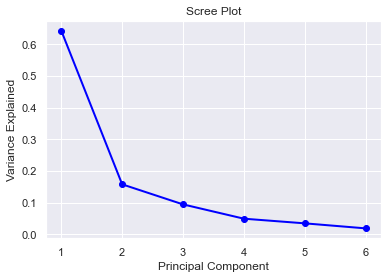

In [65]:
plt.plot(PC_values_2019, pca_2019_version2.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [66]:
#2021
x_2021_verion2 = wh_2021_complete_reset.iloc[:, 4:10]

In [67]:
scaled_df_2021=x_2021_verion2.copy()

In [68]:
scaled_df_2021=pd.DataFrame(scaler.fit_transform(scaled_df_2021), columns=scaled_df_2021.columns)

In [69]:
pca_2021_version2 = PCA(n_components=6)

In [70]:
pca_fit_2021 = pca_2021_version2.fit(scaled_df_2021)

In [71]:
PC_values_2021 = np.arange(pca_2021_version2.n_components_) + 1

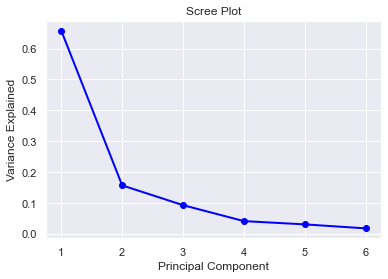

In [72]:
plt.plot(PC_values_2021, pca_2021_version2.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [73]:
#PCA 2019 using standard deviation
pca_2019 = PCA(n_components = 2)
pca_wh_2019 = pca_2019.fit_transform(wh_std_x_2019)
new_wh_x_2019 = pd.DataFrame(data = pca_wh_2019, columns = ['principal component 1', 'principal component 2'])
new_wh_x_2019

,principal component 1,principal component 2
0,5.634976,-0.544422
1,0.672629,-0.600397
2,1.506986,-1.722336
3,-0.931811,-0.815905
4,-0.407466,0.756582
...,...,...
121,-1.850172,0.337193
122,-1.224474,1.380966
123,-0.490177,0.309374
124,2.756305,0.708481


In [74]:
wh_2019_complete_reset_version2 = wh_2019_complete.reset_index()

In [75]:
wh_2019_complete_reset_version2[['Regional_indicator']].head()

,Regional_indicator
0,South Asia
1,Central and Eastern Europe
2,Middle East and North Africa
3,Latin America and Caribbean
4,Commonwealth of Independent States


In [76]:
finalDf_2019 = pd.concat([new_wh_x_2019, wh_2019_complete_reset_version2[['Regional_indicator']]], axis = 1)
finalDf_2019.head(5)

,principal component 1,principal component 2,Regional_indicator
0,5.634976,-0.544422,South Asia
1,0.672629,-0.600397,Central and Eastern Europe
2,1.506986,-1.722336,Middle East and North Africa
3,-0.931811,-0.815905,Latin America and Caribbean
4,-0.407466,0.756582,Commonwealth of Independent States


In [77]:
# PCA 2021 using standard deviation
pca_2021 = PCA(n_components = 2)
pca_wh_2021 = pca_2021.fit_transform(wh_std_x_2021)
new_wh_x_2021 = pd.DataFrame(data = pca_wh_2021, columns = ['principal component 1', 'principal component 2'])
new_wh_x_2021
# pca_2021 = PCA(n_components = 6)
# pca_wh_2021 = pca_2021.fit_transform(wh_std_x_2021)
# new_wh_x_2021 = pd.DataFrame(data = pca_wh_2021, columns = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6'])
# new_wh_x_2021

,principal component 1,principal component 2
0,5.652967,-0.825379
1,0.601071,-0.538174
2,1.247987,-1.501692
3,-0.918915,-0.759789
4,-0.236579,0.477741
...,...,...
121,-1.807942,0.403588
122,-1.295697,1.444465
123,-0.437318,0.308689
124,2.322798,0.471914


In [78]:
wh_2021_complete_reset_version2 = wh_2021_complete.reset_index()

In [79]:
wh_2021_complete_reset_version2[['Regional_indicator']].head()

,Regional_indicator
0,South Asia
1,Central and Eastern Europe
2,Middle East and North Africa
3,Latin America and Caribbean
4,Commonwealth of Independent States


In [80]:
finalDf_2021 = pd.concat([new_wh_x_2021, wh_2021_complete_reset_version2[['Regional_indicator']]], axis = 1)
finalDf_2021.head(5)

,principal component 1,principal component 2,Regional_indicator
0,5.652967,-0.825379,South Asia
1,0.601071,-0.538174,Central and Eastern Europe
2,1.247987,-1.501692,Middle East and North Africa
3,-0.918915,-0.759789,Latin America and Caribbean
4,-0.236579,0.477741,Commonwealth of Independent States


In [81]:
################# PCA PLOT DIAGRAM #####################

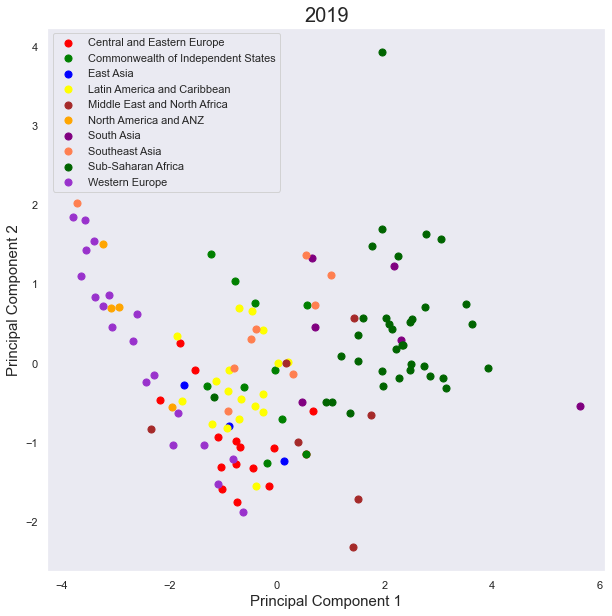

In [82]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2019', fontsize = 20)


targets = ['Central and Eastern Europe', 'Commonwealth of Independent States', 'East Asia', 'Latin America and Caribbean',
          'Middle East and North Africa', 'North America and ANZ', 'South Asia', 'Southeast Asia', 'Sub-Saharan Africa',
          'Western Europe']
colors = ['red','green','blue','yellow','brown','orange','purple','coral','darkgreen','darkorchid']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf_2019['Regional_indicator'] == target
    ax.scatter(finalDf_2019.loc[indicesToKeep, 'principal component 1']
               , finalDf_2019.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

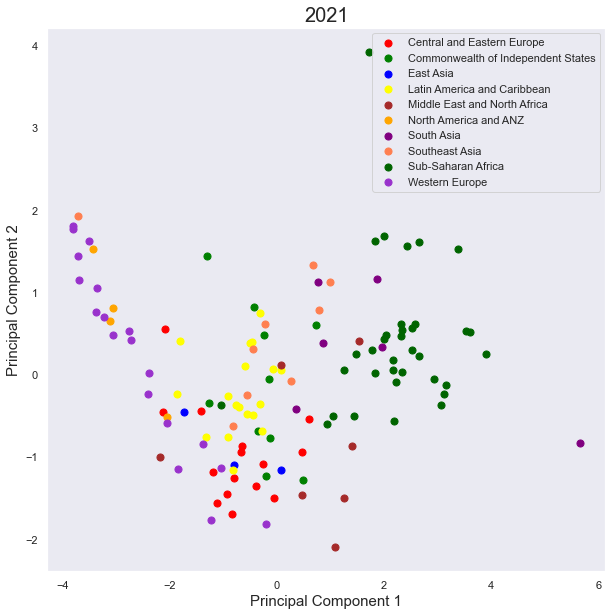

In [83]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2021', fontsize = 20)


targets = ['Central and Eastern Europe', 'Commonwealth of Independent States', 'East Asia', 'Latin America and Caribbean',
          'Middle East and North Africa', 'North America and ANZ', 'South Asia', 'Southeast Asia', 'Sub-Saharan Africa',
          'Western Europe']
colors = ['red','green','blue','yellow','brown','orange','purple','coral','darkgreen','darkorchid']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf_2021['Regional_indicator'] == target
    ax.scatter(finalDf_2021.loc[indicesToKeep, 'principal component 1']
               , finalDf_2021.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()